In [2]:
! git clone https://www.github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

def pn(x):
    print(x,'\n')
    return

In [4]:
#Question 2 part 1: Load Data
tf = pd.read_csv('knn/data/USA_cars_datasets.csv') 


In [5]:
#Question 2 part 1: Keep the following variables and drop the rest: price, year, mileage
tf= tf[['price', 'year', 'mileage']] 
print(tf.columns) #check 


Index(['price', 'year', 'mileage'], dtype='object')


In [6]:
#Question 2 part 1: Are there any NA's to handle? No
tf.isna().sum()

price      0
year       0
mileage    0
dtype: int64

In [7]:
#Question 2 part 1: Look at the head and dimensions of the data
print(tf.head())
print(tf.shape)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [8]:
#Question 2 part 2: Maxmin normalize year and mileage.
y = tf['price'] 
X = tf.loc[:,['year','mileage']] 
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)


X = X.apply(maxmin)
pn(X.head())
pn(X.describe())



       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537 

              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000 



In [9]:
#Question 2 part 3: Split the sample into ~80% for training and ~20% for evaluation.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

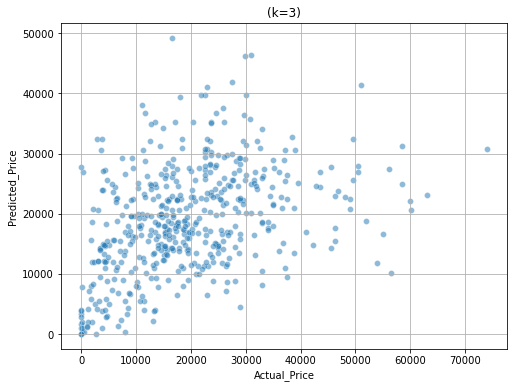

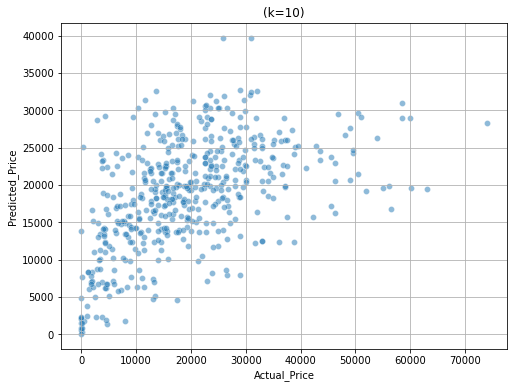

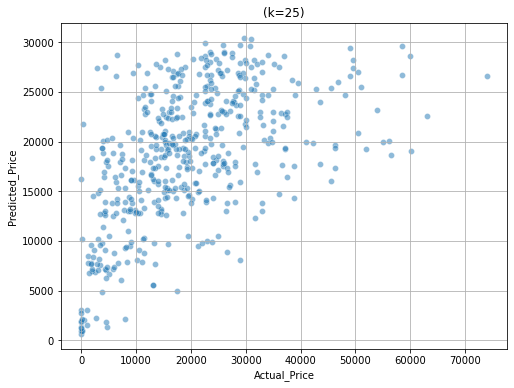

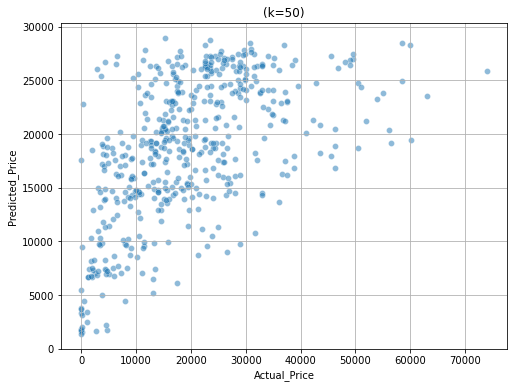

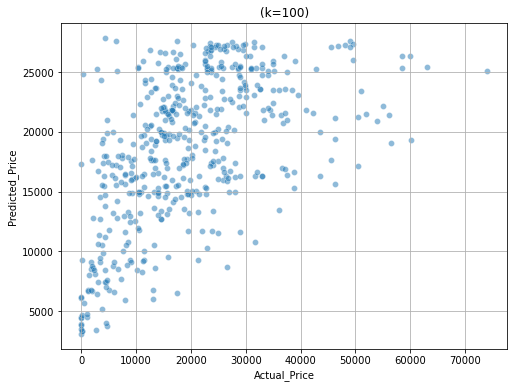

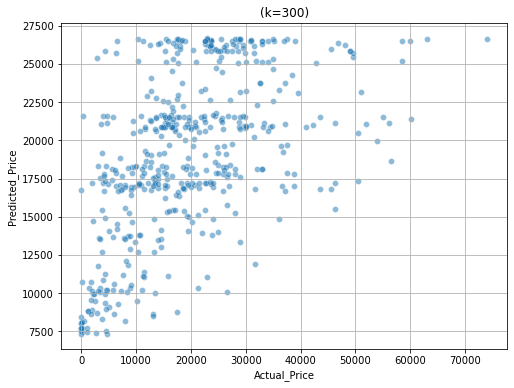

In [10]:
#Question 2 part 4:Use the kNN algorithm for regression and the training data to predict price using year and mileage for the test set for k= 3, 10, 25, 50, 100, 300For each value of k, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase k 
#As the value of k increases the SSE decreases the until the value of k becomes greater then 50 then as the k value increases the SSE value increases, when k=50 the SSE is the lowest indicating that incomparsion to the other k values it best fits the data, once the value of k become greater then 50 the data is underfitted indicated by the SSE value increasing



k_values = [3, 10, 25, 50, 100, 300]
SSE_train = np.zeros(len(k_values))
SSE_test = np.zeros(len(k_values))

for i in range(len(k_values)):
    k = k_values[i]
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_hat_test = fitted_model.predict(X_test)
    SSE_test[i] = np.sum((y_test - y_hat_test) ** 2)
    y_hat = fitted_model.predict(X_train)
    SSE_train[i] = np.sum((y_train - y_hat) ** 2)

    tf = pd.DataFrame({  
        'Actual_Price': y_test,
        'Predicted_Price': y_hat_test
    })

    # Create a scatterplot 
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=tf, x='Actual_Price', y='Predicted_Price', alpha=0.5)
    plt.title(f'(k={k})')
    plt.grid(True)
    plt.show()












In [11]:
#Question 2 part 5: Determine the optimal k for these data.
# 50
SSE_min = np.min(SSE_test) 
min_index = np.where(SSE_test == SSE_min)[0]  
k_star = k_values[min_index[0]] 
print(k_star)




50


In [12]:
#Question 5 part 1: Load Data
cf = pd.read_csv('knn/data/airbnb_hw.csv')
cf.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [13]:
cf['Price'].unique()


array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [14]:
#Question 5 part 1: Clean Price
print(cf['Price'].unique())
cf['Price'] = cf['Price'].str.replace(',', '').astype(float)
print(cf['Price'].isna().sum())

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [15]:
#Question 5 part 1: Beds
print(cf['Beds'].unique())
print(cf['Beds'].isna().sum())

[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]
85


In [16]:
#Question 5 part 1: Number Of Reviews
print(cf['Number Of Reviews'].unique())
print(cf['Number Of Reviews'].isna().sum())

[  0   1  39   4   9  80  95  23  14 120  81  17  32  52   3 171  16  19
   2  28  62   6   5  12  40  47  13  35  34  68  42   7  41  15  21   8
  10  29 112  25 132  51 156  30  98  24  74  20 188 221  57  11 242  67
 118  60 136 119  79 106  43  91 105  96 141 146  63  58  18 150  38  55
  89  46  77  48  36  69  26  73  53 165  92  87 108 109  50 127  88  83
 184 179  22  31  82  27 123 247 190 257 217  85 103 157 102  56 125 115
  49  97  54  65  90  44  33 100  37 107 114 116  61 104  71  75 145  84
  93 110 172 148 131 154  86  64  76 129  45 180 140  78 200 175 189 170
 187  72 137  99 101  59  94 124 223 173 151 142 163 121 256 248 149 128
 133  66 117 176 111  70 183 218 192 206 161 216 191 213 178 122 153 177
 167 113 126 135 181 138 143 195 182 198 211 166 139 134 144 174 159 155
 203 201 164 212 236 235 130]
0


In [17]:
#Question 5 part 1: Review Scores Rating
print(cf['Review Scores Rating'].unique())
print(cf['Review Scores Rating'].isna().sum())

[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.]
8323


In [18]:
#Question 5 part 2: Maxmin normalize the data and remove any nan's
cf.dropna(inplace=True)
cf.isna().sum()

Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
dtype: int64

In [50]:
#Question 5 part 3: Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.
def maxmin(x):  
    x = (x - min(x)) / (max(x) - min(x))
    return x


X = cf[['Beds', 'Number Of Reviews', 'Review Scores Rating']]  
X = X.apply(maxmin)

# Create a KMeans model:
k = 6  
model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
model = model.fit(X)





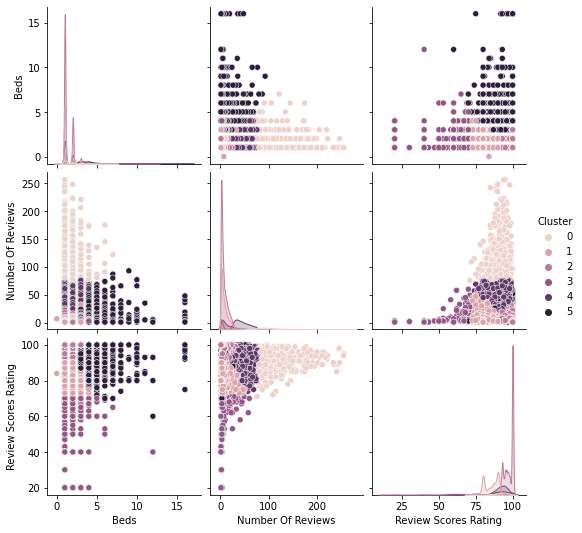

In [43]:
#Question 5 part 4: Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
cf['Cluster'] = model.predict(X)
columns = ['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Cluster']
sns.pairplot(cf[columns], hue='Cluster')


In [42]:
#Question 5 part 5:Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

price_description = cf.groupby('Cluster')['Price'].describe()


print(price_description['mean'])

# The clusters with the highest rental prices is cluster 5

Cluster
0    133.279431
1    131.714131
2    152.298490
3    133.457143
4    141.495495
5    293.354037
Name: mean, dtype: float64


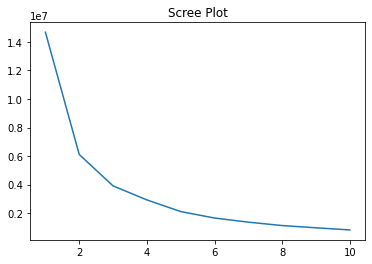

In [54]:
#Question 5 part 6:Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
#Based on the scree plot the number of clusters should be three
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x
X = cf[['Beds', 'Number Of Reviews', 'Review Scores Rating']]
X_normalized = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1) 
SSE = np.zeros(k_bar) 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(X) 
    SSE[k] = model.inertia_ 
    
scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')


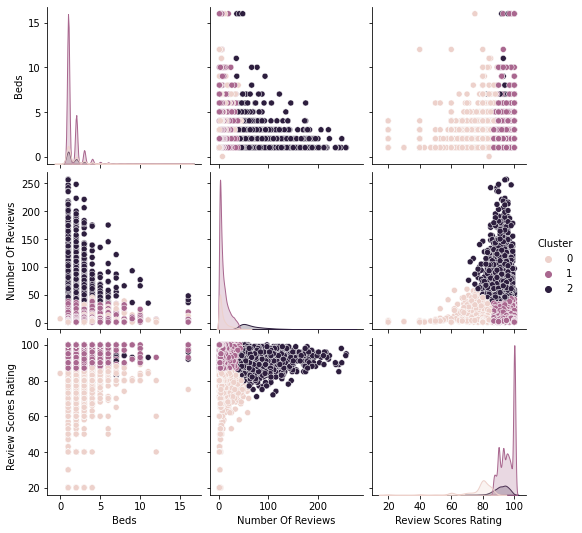

In [53]:
#Question 5 part 6: repeat step 6 

model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
model.fit(X)
cf['Cluster'] = model.predict(X)

# Visualizing clusters
sns.pairplot(cf[['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Cluster']], hue='Cluster')



In [125]:
#Question 5 part 6: repeat step 5 
price_description = cf.groupby('Cluster')['Price'].describe()
print(price_description['mean'])#had to check at first I was only getting three clusters 


Cluster
0    160.083439
1    140.199143
2    142.885944
Name: mean, dtype: float64


In [62]:
#Question 6 part 1:Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) 
    
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,noise,N)])
    
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

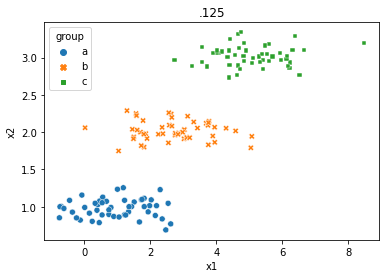

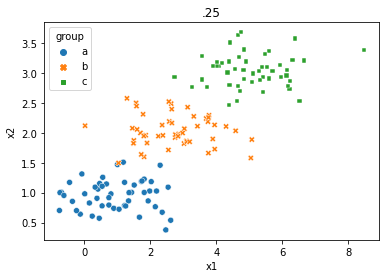

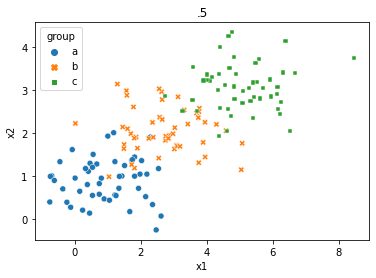

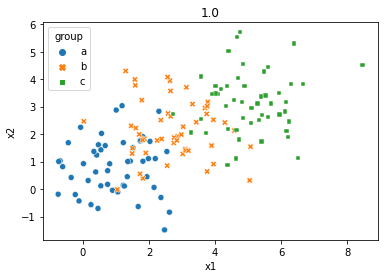

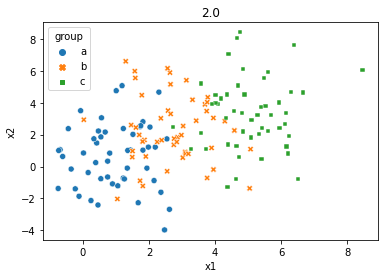

In [77]:
#Question 6 part 2: Make scatterplots of the  (X1,X2)  points by group for each of the datasets.

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
titles = [".125", ".25", ".5", "1.0", "2.0"]

for i in range(len(datasets)):
    plt.figure() 
    sns.scatterplot(data=datasets[i], x='x1', y='x2', hue='group', style='group')
    plt.title(titles[i])  
     




In [78]:
#Question 6 part 2: Make scatterplots of the  (X1,X2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
#As the noise level increase the visual distinctiveness decreases, aka the clusters shift closer togeather to the point where it's difficult to tell the groups apart, after the noise group .5 it becames very hard to tell the clusters apart 





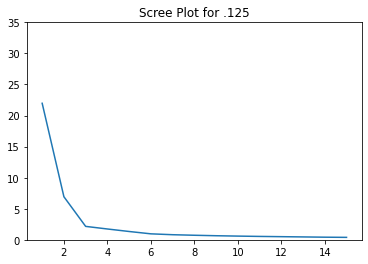

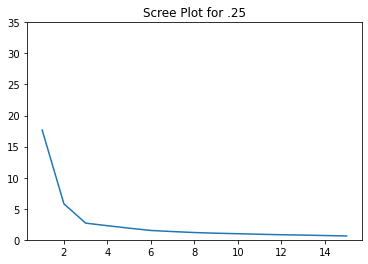

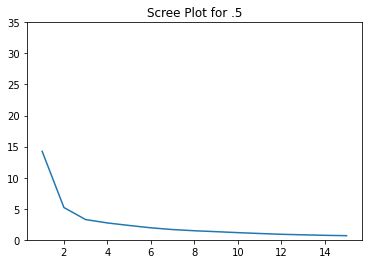

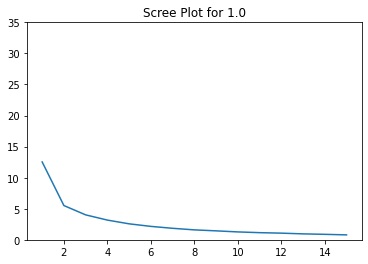

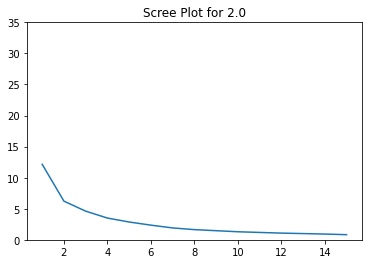

In [70]:
#Question 6 part 3: Create a scree plot for each of the datasets. 
def maxmin(x):
    x = (x - min(x)) / (max(x) - min(x))
    return x

def scree(data, title=None):
       
    X = data.loc[:, ['x1', 'x2']]
    X = X.apply(maxmin)
    
    # Create a scree plot
    k_bar = 15
    k_grid = np.arange(1, k_bar + 1)
    SSE = np.zeros(k_bar)
    
    for k in range(k_bar):
        model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot' if not title else 'Scree Plot for ' + title)
    axes.set_ylim(0, 35)


datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
titles = [".125", ".25", ".5", "1.0", "2.0"]

for i in range(len(datasets)):
    scree(data=datasets[i], title=titles[i]) 




In [ ]:
#Question 6 part 3: Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  k .
#Noise at .125 elbow at k=3, noise at .5 elbow at k=3, noise at 1.0 elbow might be at k=2, noise at 2.0 elbow can not be determined, as the level of noise increases the distictiveness of the elbow decreases 

In [28]:
#Question 6 part 3: Explain the intuition of the elbow, using this numerical simulation as an example.
# In clustering, the "elbow" method involves plotting the number of clusters against the sum of squared errors (SSE). As the number of clusters increases, SSE usually decreases because data points are more closely assigned to their respective centers. The "elbow" of the plot is the point where the reduction in SSE starts to slow down, indicating an optimal number of clusters.
# Using this numerical simulation as an example the level of noise in the data affects the clarity of the clusters and the distinctiveness of the elbow in the scree plot. As noise increases, the elbow becomes less pronounced or even indistinct, making it harder to determine the optimal number of clusters.